In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None) #so the maximum number of columns are displayed in .head()

In [3]:
#Loading the dataset on a datafdrame data
data = pd.read_csv("Android_Malware.csv")

C:\Users\Devansh\AppData\Local\Temp\ipykernel_10208\2565550375.py:2: DtypeWarning: Columns (56,58,63) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Android_Malware.csv")


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355630 entries, 0 to 355629
Data columns (total 86 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    355630 non-null  int64  
 1   Flow ID                       355629 non-null  object 
 2    Source IP                    355630 non-null  object 
 3    Source Port                  355630 non-null  int64  
 4    Destination IP               355630 non-null  object 
 5    Destination Port             355630 non-null  float64
 6    Protocol                     355630 non-null  float64
 7    Timestamp                    355630 non-null  object 
 8    Flow Duration                355630 non-null  int64  
 9    Total Fwd Packets            355630 non-null  int64  
 10   Total Backward Packets       355630 non-null  int64  
 11  Total Length of Fwd Packets   355630 non-null  float64
 12   Total Length of Bwd Packets  355630 non-nul

In [5]:
#Dropping all the missing values from data
print(data.isnull().sum())
data = data.dropna()

Unnamed: 0         0
Flow ID            1
 Source IP         0
 Source Port       0
 Destination IP    0
                  ..
Idle Mean          4
 Idle Std          4
 Idle Max          4
 Idle Min          4
Label              0
Length: 86, dtype: int64


In [6]:
#Dropping Android_Adware and Android_Scareware
data['Label'].unique()
labels_to_remove = ['Android_Adware', 'Android_Scareware']
data = data[~data['Label'].isin(labels_to_remove)]

In [7]:
target_counts = data['Label'].value_counts()
# sns.countplot(data, x = 'Label')
print('Class Distribution')
print(target_counts)

Class Distribution
Android_SMS_Malware    67394
Benign                 23708
Name: Label, dtype: int64


In [9]:
data.columns = [i.strip() for i in data.columns] # stripping all the whitespaces from the column names

In [14]:
len(data['Flow ID'].unique())

47868

In [15]:
len(data['Source IP'].unique())

1265

In [16]:
len(data['Destination IP'].unique())

2376

C:\Users\Devansh\AppData\Local\Temp\ipykernel_10208\1457417642.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skewness = data.drop("Label", axis=1).skew()


Skewness for Features:
Unnamed: 0           1.184780
Source Port         -1.088682
Destination Port     2.607855
Protocol             1.513961
Flow Duration        2.499464
                      ...    
Active Min           9.437507
Idle Mean            3.894468
Idle Std            11.631988
Idle Max             3.685133
Idle Min             4.113138
Length: 81, dtype: float64


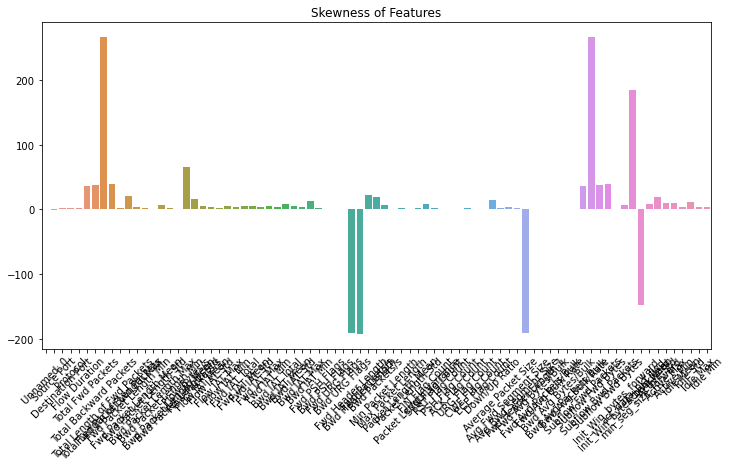

In [19]:
# Calculate skewness for each feature
skewness = data.drop("Label", axis=1).skew()
print("Skewness for Features:")
print(skewness)
s_skewness = sort(skewness)
# Visualize the skewness of features
plt.figure(figsize=(12, 6))
sns.barplot(x=skewness.index, y=skewness.values)
plt.title("Skewness of Features")
plt.xticks(rotation=45)
plt.show()

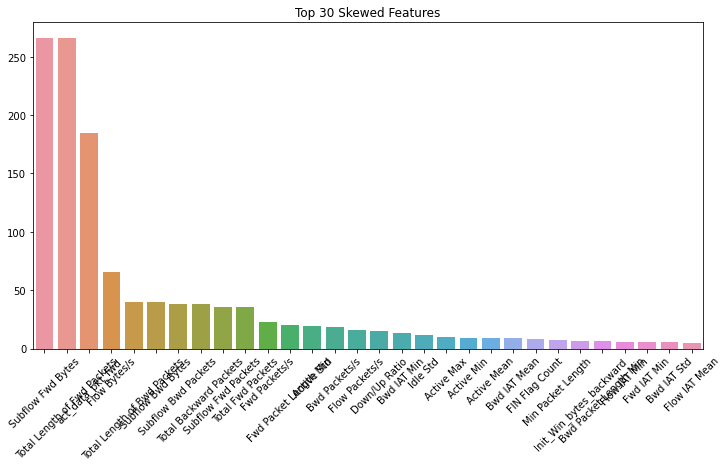

In [22]:
sorted_skewness = skewness.sort_values(ascending=False)

# Choose the top N features to plot
top_features_to_plot = 30  # Adjust as needed

# Plot the skewness of the top features
plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_skewness.index[:top_features_to_plot], y=sorted_skewness.values[:top_features_to_plot])
plt.title("Top {} Skewed Features".format(top_features_to_plot))
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

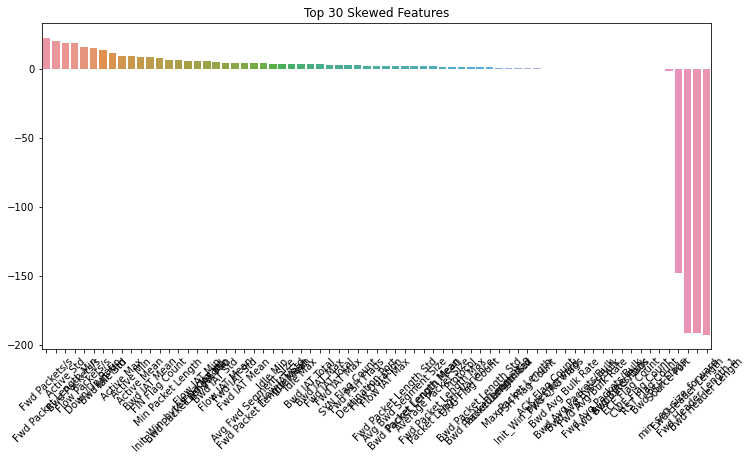

In [26]:
plt.figure(figsize=(12, 6))
last_10 = 10
sns.barplot(x=sorted_skewness.index[last_10:], y=sorted_skewness.values[last_10:])
plt.title("Top {} Skewed Features".format(top_features_to_plot))
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()